In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import seaborn as sns

C:\Users\Kunal\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
from scipy.stats.distributions import bernoulli
def throw_a_coin(n):
    brv = bernoulli(0.5)
    return brv.rvs(size=n)


In [4]:
random_flips = throw_a_coin(10000)
running_means = np.zeros(10000)
sequence_length = np.arange(1,10001,1)
for i in sequence_length:
    running_means[i-1] = np.mean(random_flips[:i])

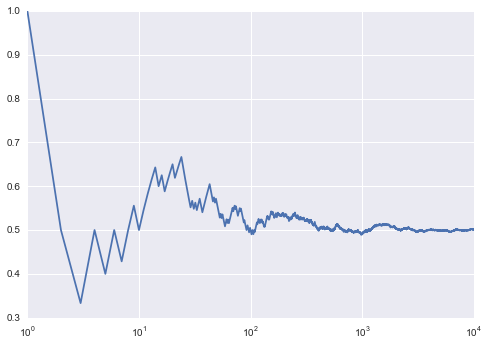

In [7]:
plt.plot(sequence_length, running_means)
plt.xscale("log")

In [8]:
def make_throws(number_of_samples, sample_size):
    start=np.zeros((number_of_samples, sample_size), dtype=int)
    for i in range(number_of_samples):
        start[i,:]=throw_a_coin(sample_size)
    return np.mean(start, axis=1)

In [9]:
make_throws(number_of_samples=20, sample_size=10)

array([ 0.4,  0.2,  0.5,  0.7,  0.7,  0.6,  0.6,  0.4,  0.2,  0.5,  0.3,
        0.4,  0.4,  0.4,  0.6,  0.5,  0.3,  0.3,  0.4,  0.3])

In [11]:
sample_sizes = np.arange(1,1001,1)
sample_means = [make_throws(number_of_samples=200, sample_size=i) for i in sample_sizes]

In [14]:
np.array(sample_means).shape

(1000, 200)

In [15]:
mean_of_sample_means = [np.mean(means) for means in sample_means]

(0.48, 0.52)

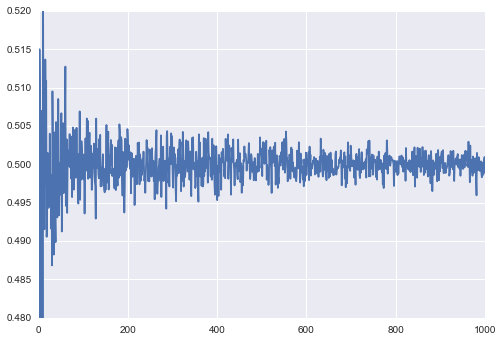

In [22]:
plt.plot(sample_sizes, mean_of_sample_means)
plt.ylim([0.480,0.520])

In [26]:
sample_means_at_size_10 = sample_means[9]
sample_means_at_size_100 = sample_means[99]
sample_means_at_size_1000 = sample_means[999]

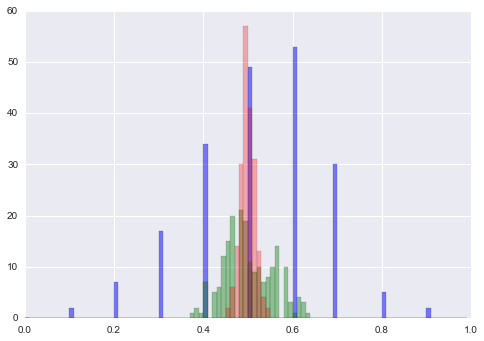

In [34]:
plt.hist(sample_means_at_size_10, bins=np.arange(0,1,0.01), alpha=0.5,color='b');
plt.hist(sample_means_at_size_100, bins=np.arange(0,1,0.01), alpha=0.4, color='g');
plt.hist(sample_means_at_size_1000, bins=np.arange(0,1,0.01), alpha=0.3, color='r');

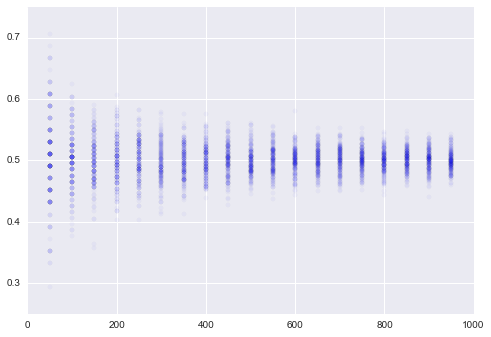

In [39]:
for i in sample_sizes:
    if i % 50 == 0 and i < 1000:
        plt.scatter([i]*200, sample_means[i], alpha=0.03);
plt.xlim([0,1000])
plt.ylim([0.25,0.75]);